In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager



In [4]:
parks_path = 'parks.csv'
reports_path = 'reports.csv'
parks = pd.read_csv(parks_path)
reports = pd.read_csv(reports_path)

In [6]:
fe = font_manager.FontEntry(fname=r'/System/Library/Fonts/Supplemental/AppleGothic.ttf', name='AppleGothic')
font_manager.fontManager.ttflist.insert(0, fe)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [10]:
parks.head()

,주소,총주차면,평일유료,토요일유료,공휴일유료,평일시작,평일종료,토요일시작,토요일종료,공휴일시작,공휴일종료,경도,위도
0,도봉구 창동 24-0,71.0,Y,N,N,09:00:00,19:00:00,09:00:00,19:00:00,09:00:00,19:00:00,127.051008,37.653485
1,노원구 상계동 770-2,177.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,127.057986,37.643675
2,성동구 마장동 463-2,54.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,127.035104,37.569968
3,영등포구 당산동3가 385-0,190.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,126.895778,37.525545
4,영등포구 대림동 780-0,192.0,Y,N,N,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,126.894445,37.499238


In [25]:
reports.head()

,민원접수일,민원접수시간,주소,경도,위도,요일
0,2021-09-29,19:29:00,서울특별시 강서구 강서로15길 49,126.843247,37.532089,Weekday
1,2021-09-29,00:05:00,서울 강서구 화곡로66길 130,126.859911,37.555537,Weekday
2,2021-09-29,00:38:00,중구 다산로48길 33 단우물어린이집앞,127.018013,37.567483,Weekday
3,2021-09-29,00:38:00,서울특별시 중구 마장로 19,127.012793,37.569183,Weekday
4,2021-09-29,00:50:00,서울특별시 강서구 까치산로15길 21,126.847125,37.547040,Weekday


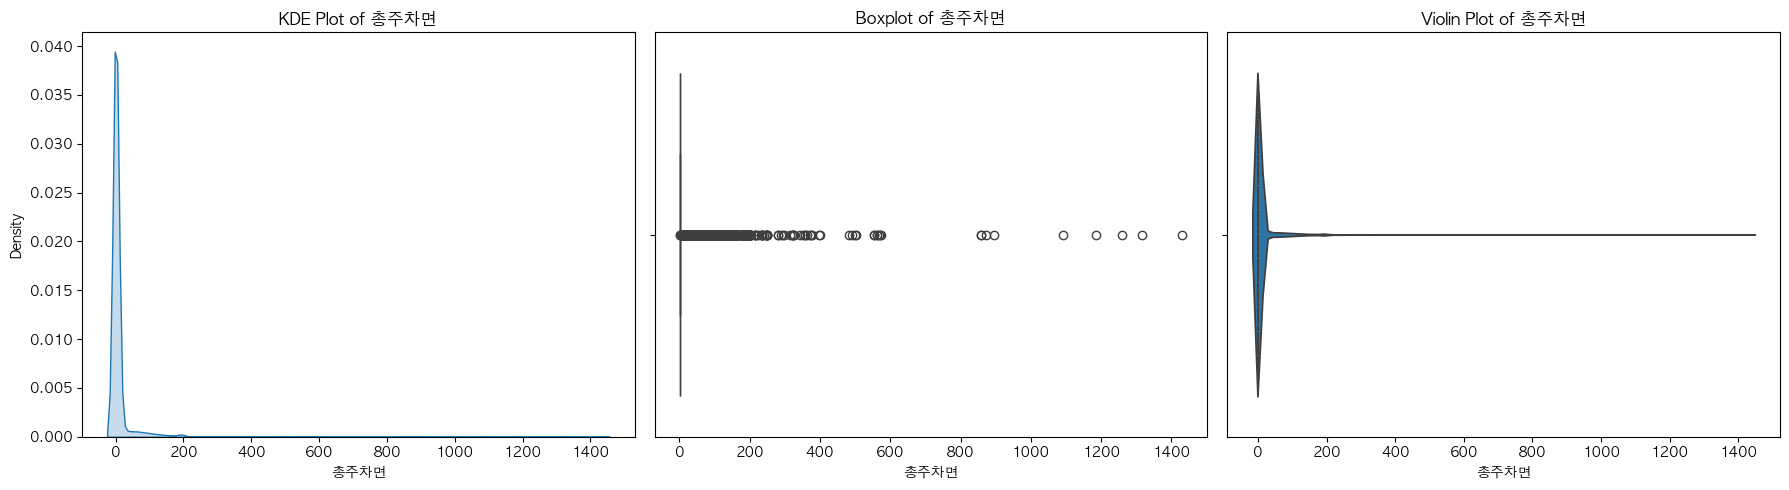

In [17]:
# 3 different ways to visualize the distribution of '총주차면' (parking spaces)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) KDE plot
sns.kdeplot(
    data=parks['총주차면'].dropna(),
    ax=axes[0],
    fill=True,
    bw_adjust=1
)
axes[0].set_title("KDE Plot of 총주차면")
axes[0].set_xlabel("총주차면")
axes[0].set_ylabel("Density")

# 2) Boxplot
sns.boxplot(
    x=parks['총주차면'].dropna(),
    ax=axes[1]
)
axes[1].set_title("Boxplot of 총주차면")
axes[1].set_xlabel("총주차면")

# 3) Violin plot
sns.violinplot(
    x=parks['총주차면'].dropna(),
    ax=axes[2],
    inner="quartile"
)
axes[2].set_title("Violin Plot of 총주차면")
axes[2].set_xlabel("총주차면")

plt.tight_layout()
plt.show()


/var/folders/pf/y0k140gn11d95ybm0dgtk6m80000gn/T/ipykernel_38688/961309472.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=axs[1,0], palette='muted')


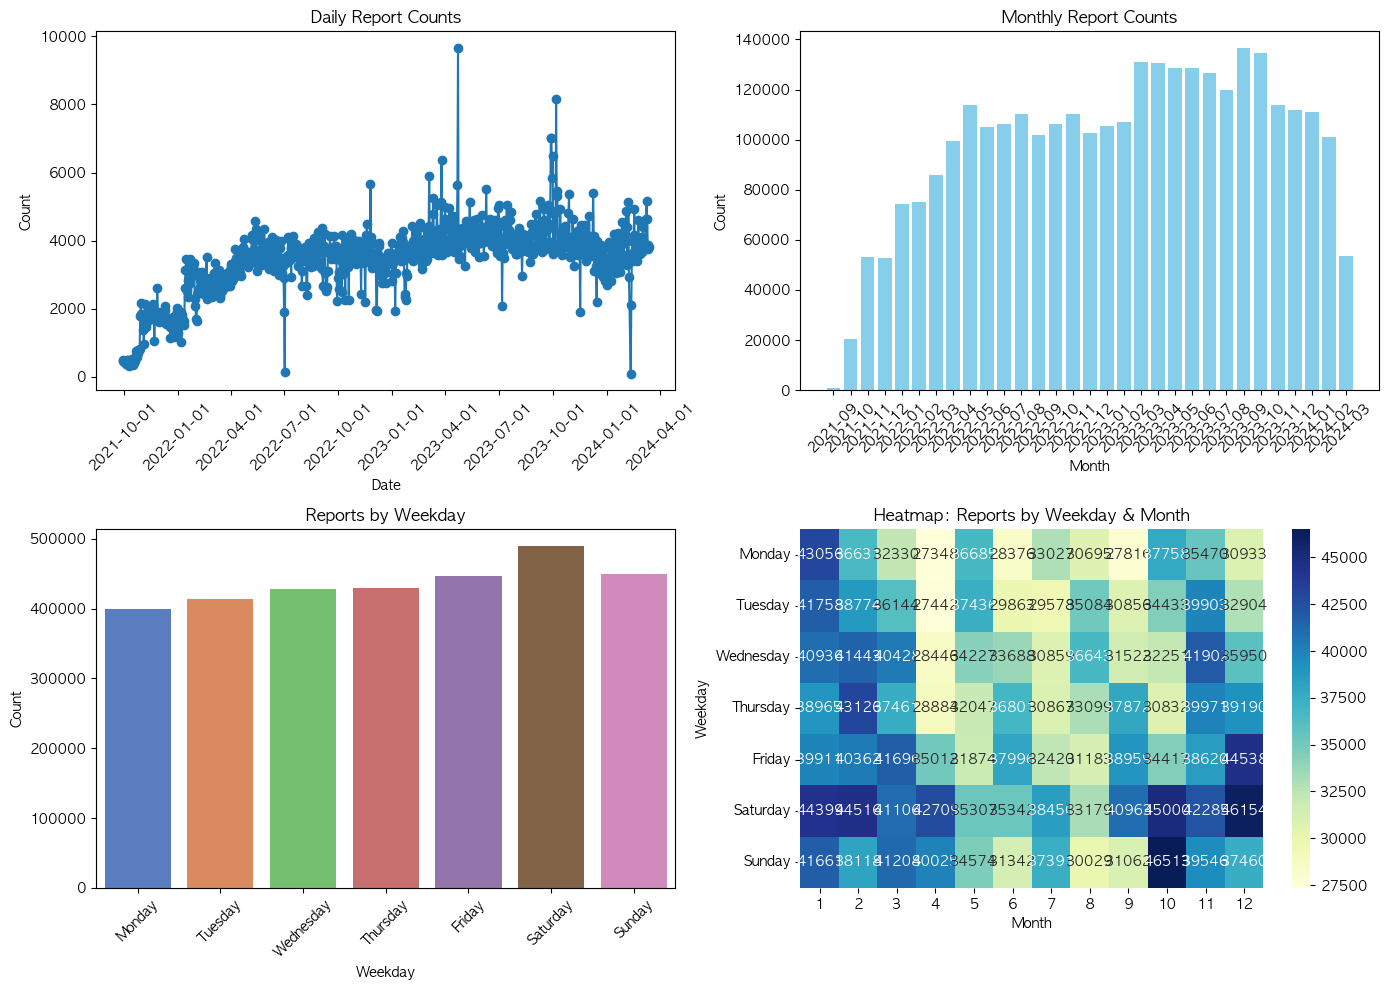

In [23]:
# VSCode.Cell: new
import matplotlib.dates as mdates

# 1) Parse '민원접수일'
reports['민원접수일'] = pd.to_datetime(reports['민원접수일'], errors='coerce')

# 2) Aggregate
daily_counts   = reports.groupby(reports['민원접수일'].dt.date).size()
monthly_counts = reports.groupby(reports['민원접수일'].dt.to_period('M')).size()
weekday_counts = (
    reports
    .groupby(reports['민원접수일'].dt.day_name())
    .size()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)
heatmap_data = (
    reports
    .groupby([reports['민원접수일'].dt.day_name(), reports['민원접수일'].dt.month])
    .size()
    .unstack(fill_value=0)
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

# 3) Plot 2×2 grid
fig, axs = plt.subplots(2, 2, figsize=(14,10))

# (a) Daily trend
axs[0,0].plot(daily_counts.index, daily_counts.values, marker='o')
axs[0,0].set_title('Daily Report Counts')
axs[0,0].set_xlabel('Date'); axs[0,0].set_ylabel('Count')
axs[0,0].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[0,0].tick_params(axis='x', rotation=45)

# (b) Monthly trend
axs[0,1].bar(monthly_counts.index.astype(str), monthly_counts.values, color='skyblue')
axs[0,1].set_title('Monthly Report Counts')
axs[0,1].set_xlabel('Month'); axs[0,1].set_ylabel('Count')
axs[0,1].tick_params(axis='x', rotation=45)

# (c) Weekday distribution
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, ax=axs[1,0], palette='muted')
axs[1,0].set_title('Reports by Weekday')
axs[1,0].set_xlabel('Weekday'); axs[1,0].set_ylabel('Count')
axs[1,0].tick_params(axis='x', rotation=45)

# (d) Heatmap (Weekday × Month)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', ax=axs[1,1])
axs[1,1].set_title('Heatmap: Reports by Weekday & Month')
axs[1,1].set_xlabel('Month'); axs[1,1].set_ylabel('Weekday')

plt.tight_layout()
plt.show()